# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-16 00:05:24--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-16 00:05:24--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip.5’

c

In [ ]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
replace customer_shopping_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [ ]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [ ]:
# customer_id: Esencial para identificar clientes únicos y agrupar sus transacciones.
# gender y age: Permiten una segmentación demográfica básica.
# category, quantity, price, payment_method, invoice_date, shopping_mall: Estas columnas proporcionan información sobre el comportamiento de compra de los clientes, lo cual es crucial para la segmentación conductual.
# Estas columnas nos permitirán crear segmentos basados en quiénes son los clientes (demografía) y cómo interactúan con los productos y centros comerciales (comportamiento).

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [ ]:
# =============================================================================
# 3. LIMPIEZA DE DATOS
# =============================================================================

print("Información sobre valores nulos:")
print(df.isnull().sum())

print("\nInformación sobre filas duplicadas:")
print(df.duplicated().sum())

Información sobre valores nulos:
invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

Información sobre filas duplicadas:
0


## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [ ]:
# =============================================================================
# 4. CREACIÓN DE VARIABLES DERIVADAS
# =============================================================================

# Calcular el valor total de la factura
df['total_value'] = df['quantity'] * df['price']

print("DataFrame con la nueva columna 'total_value':")
display(df.head())

DataFrame con la nueva columna 'total_value':


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

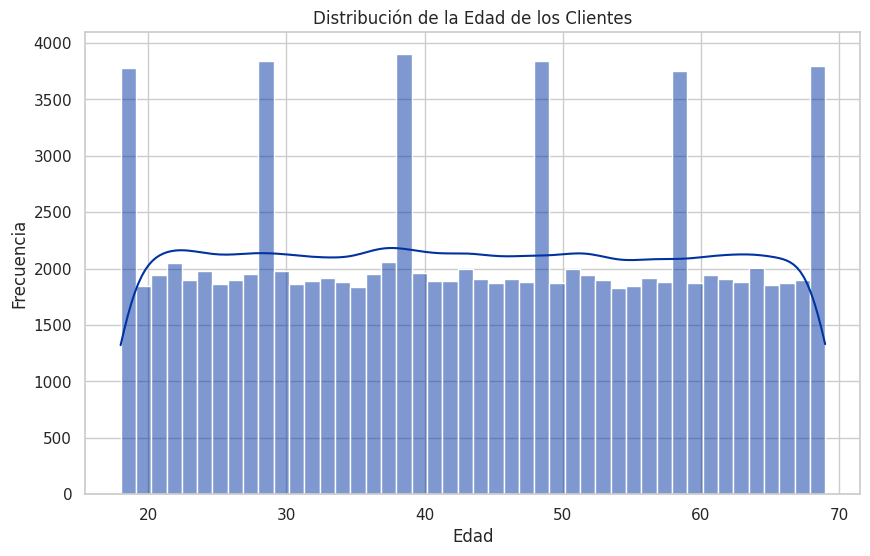

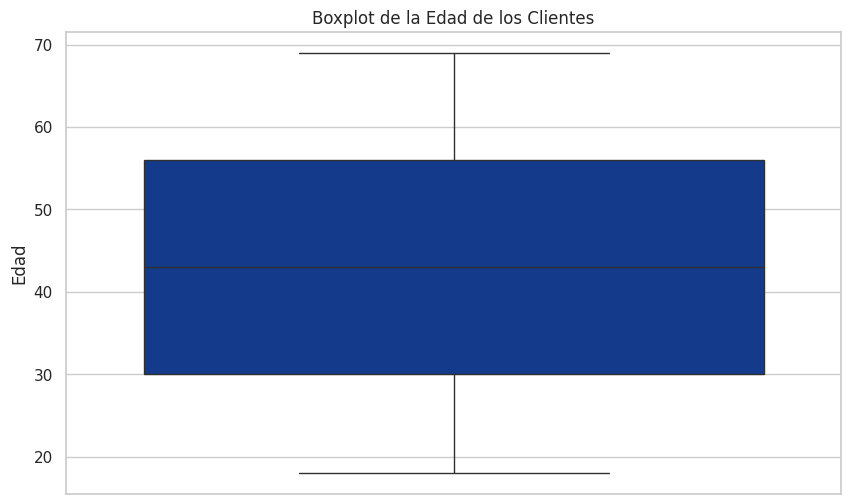

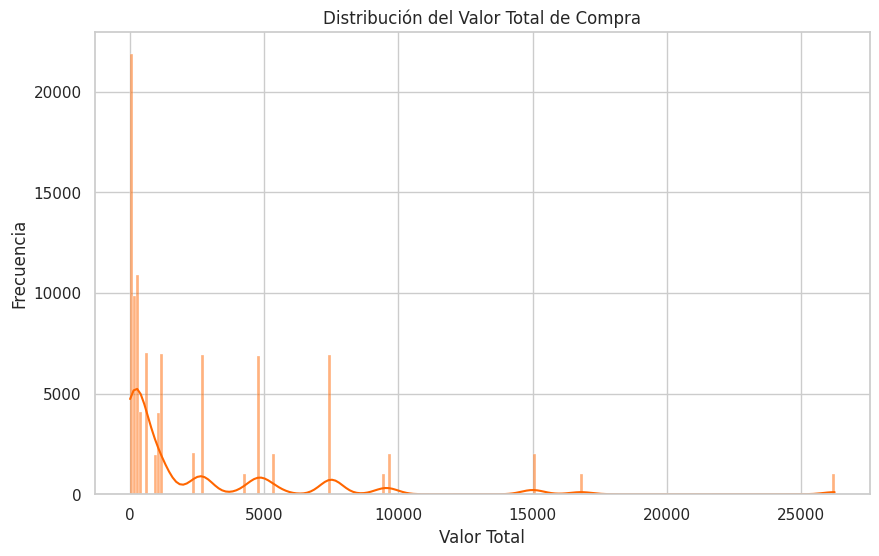

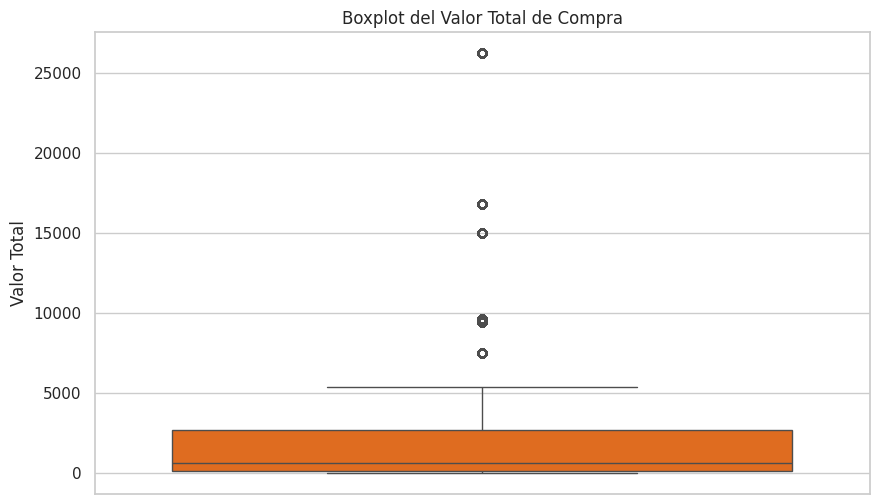

In [ ]:
# =============================================================================
# 5. VISUALIZACIÓN DE DISTRIBUCIONES
# =============================================================================

# Histograma de la edad
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, color=corporate_colors[0])
plt.title('Distribución de la Edad de los Clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot de la edad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='age', color=corporate_colors[0])
plt.title('Boxplot de la Edad de los Clientes')
plt.ylabel('Edad')
plt.show()

# Histograma del valor total de compra
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='total_value', kde=True, color=corporate_colors[1])
plt.title('Distribución del Valor Total de Compra')
plt.xlabel('Valor Total')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot del valor total de compra
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='total_value', color=corporate_colors[1])
plt.title('Boxplot del Valor Total de Compra')
plt.ylabel('Valor Total')
plt.show()

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [ ]:
# =============================================================================
# 6. DEFINICIÓN DE CRITERIOS DE SEGMENTACIÓN DEMOGRÁFICA
# =============================================================================

# Crear categorías de edad
bins = [18, 30, 55, 70] # Definir los rangos de edad
labels = ['Jóvenes', 'Adultos', 'Mayores'] # Definir las etiquetas para cada rango
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False) # Crear la nueva columna 'age_group'

print("Distribución de clientes por grupo de edad:")
display(df['age_group'].value_counts())

print("\nDistribución de clientes por género:")
display(df['gender'].value_counts())

print("\nDistribución de clientes por grupo de edad y género:")
display(pd.crosstab(df['age_group'], df['gender']))

Distribución de clientes por grupo de edad:


,count
age_group,
Adultos,47984
Mayores,28430
Jóvenes,23043



Distribución de clientes por género:


,count
gender,
Female,59482
Male,39975



Distribución de clientes por grupo de edad y género:


gender,Female,Male
age_group,,
Jóvenes,13727,9316
Adultos,28733,19251
Mayores,17022,11408


## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

In [ ]:
# =============================================================================
# 7. DEFINICIÓN DE CRITERIOS DE SEGMENTACIÓN COMPORTAMENTAL
# =============================================================================

print("Distribución de clientes por categoría de producto:")
display(df['category'].value_counts())

print("\nDistribución de clientes por método de pago:")
display(df['payment_method'].value_counts())

print("\nDistribución de clientes por centro comercial:")
display(df['shopping_mall'].value_counts())

Distribución de clientes por categoría de producto:


,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981



Distribución de clientes por método de pago:


,count
payment_method,
Cash,44447
Credit Card,34931
Debit Card,20079



Distribución de clientes por centro comercial:


,count
shopping_mall,
Mall of Istanbul,19943
Kanyon,19823
Metrocity,15011
Metropol AVM,10161
Istinye Park,9781
Zorlu Center,5075
Cevahir AVM,4991
Forum Istanbul,4947
Viaport Outlet,4914


## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

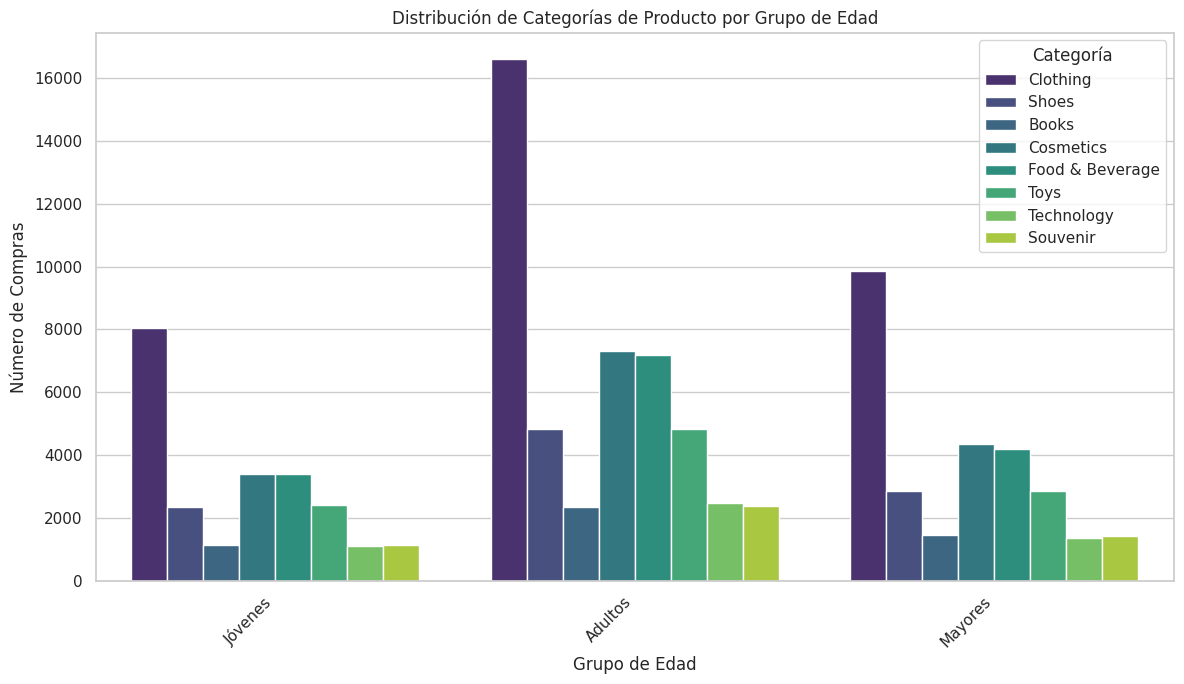

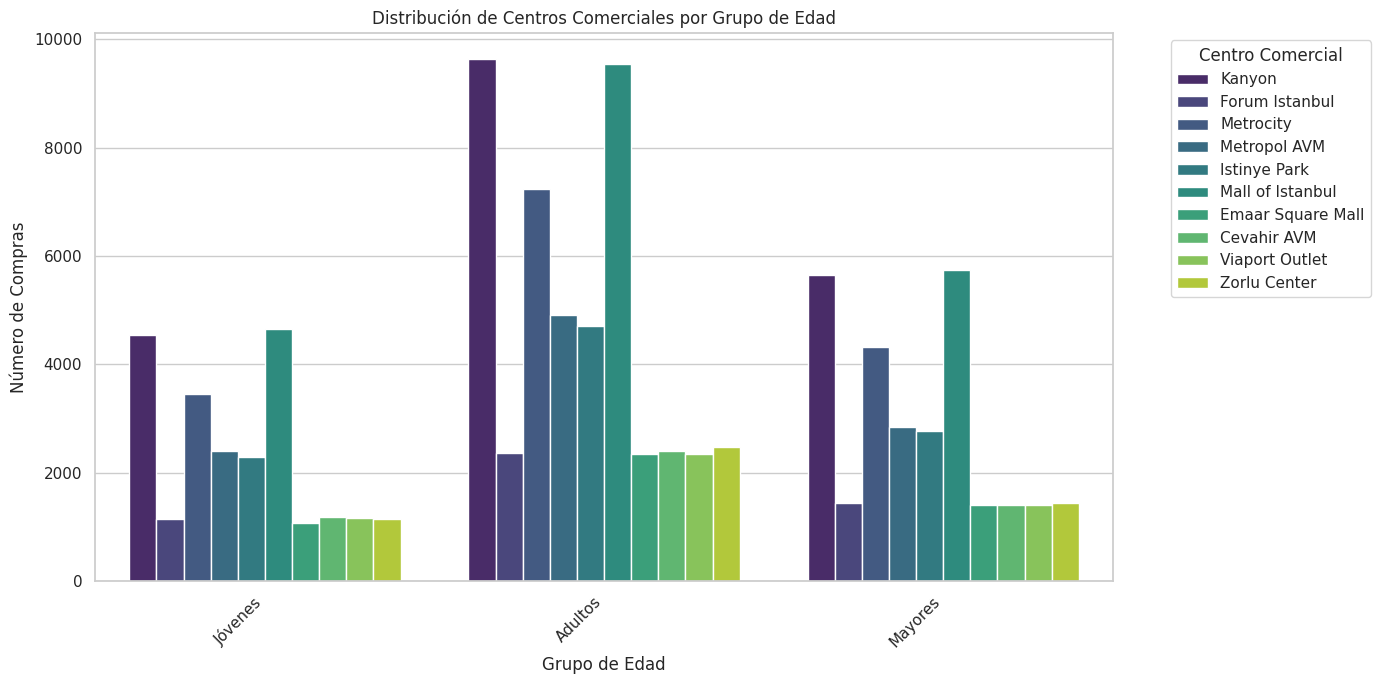

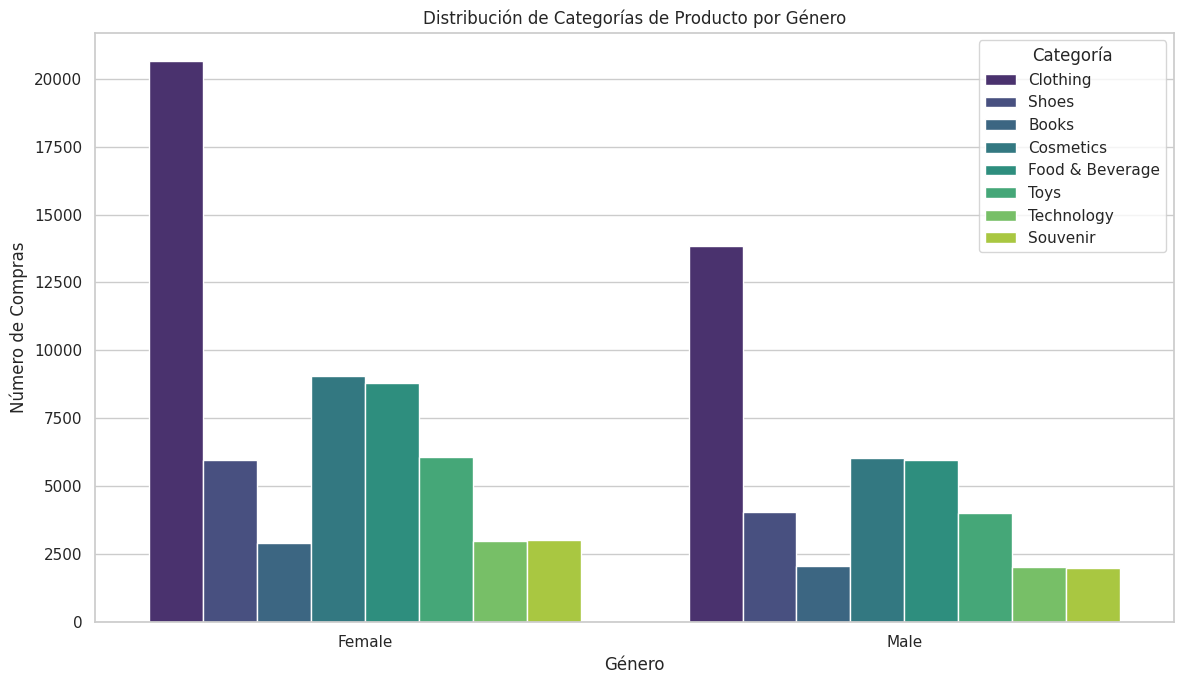

In [ ]:
# =============================================================================
# 8. VISUALIZACIONES COMPARATIVAS DE SEGMENTOS
# =============================================================================

# Comparar grupo de edad con categoría de producto
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='age_group', hue='category', palette='viridis')
plt.title('Distribución de Categorías de Producto por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

# Comparar grupo de edad con centro comercial
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='age_group', hue='shopping_mall', palette='viridis')
plt.title('Distribución de Centros Comerciales por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Centro Comercial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Comparar género con categoría de producto
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='gender', hue='category', palette='viridis')
plt.title('Distribución de Categorías de Producto por Género')
plt.xlabel('Género')
plt.ylabel('Número de Compras')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

In [ ]:
# =============================================================================
# 9. REDUCCIÓN Y AGRUPACIÓN DE CATEGORÍAS
# =============================================================================

# Identificar categorías a agrupar (las de menor frecuencia)
categories_to_group = ['Souvenir', 'Technology', 'Books']

# Reemplazar las categorías a agrupar por 'Otros'
df['category_grouped'] = df['category'].replace(categories_to_group, 'Otros')

print("Distribución de categorías después de agrupar:")
display(df['category_grouped'].value_counts())

Distribución de categorías después de agrupar:


,count
category_grouped,
Clothing,34487
Cosmetics,15097
Otros,14976
Food & Beverage,14776
Toys,10087
Shoes,10034


## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [ ]:
# =============================================================================
# 6. DEFINICIÓN DE CRITERIOS DE SEGMENTACIÓN DEMOGRÁFICA
# =============================================================================

# Crear categorías de edad con los rangos especificados por el usuario
bins = [18, 25, 45, 100] # Nuevos rangos de edad
labels = ['Jóvenes', 'Adultos', 'Mayores'] # Etiquetas para cada rango
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False) # Crear la nueva columna 'age_group'

print("Distribución de clientes por grupo de edad:")
display(df['age_group'].value_counts())

print("\nDistribución de clientes por género:")
display(df['gender'].value_counts())

print("\nDistribución de clientes por grupo de edad y género:")
display(pd.crosstab(df['age_group'], df['gender']))

Distribución de clientes por grupo de edad:


,count
age_group,
Mayores,47479
Adultos,38482
Jóvenes,13496



Distribución de clientes por género:


,count
gender,
Female,59482
Male,39975



Distribución de clientes por grupo de edad y género:


gender,Female,Male
age_group,,
Jóvenes,7938,5558
Adultos,23167,15315
Mayores,28377,19102


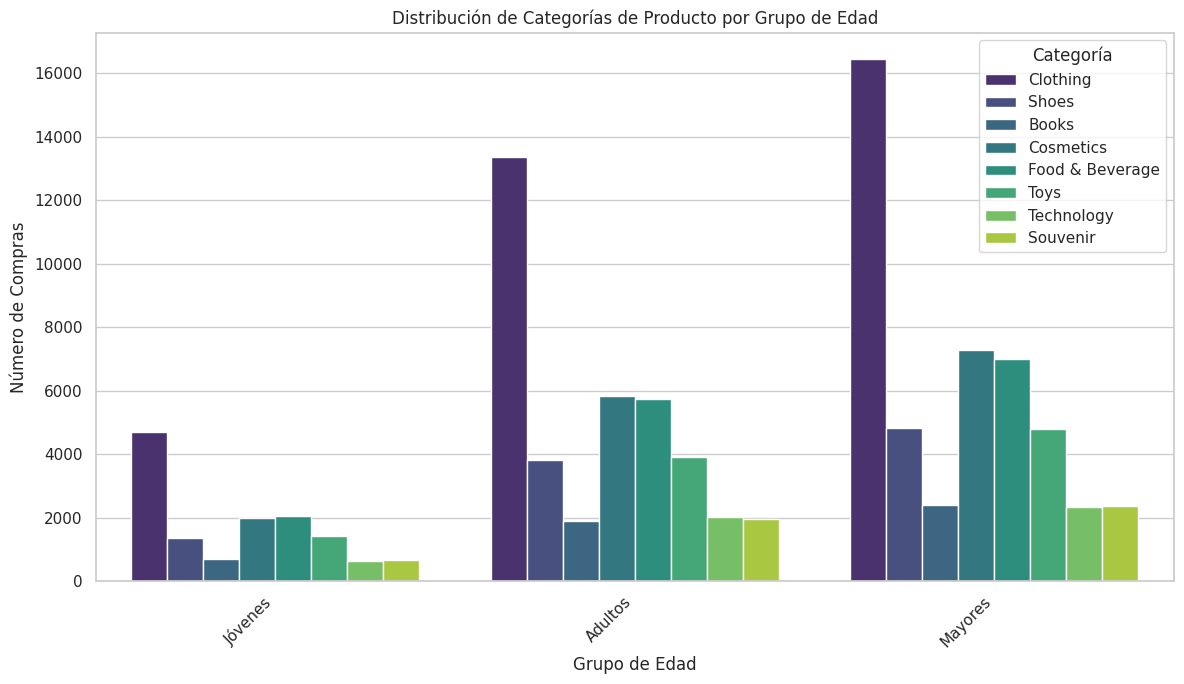

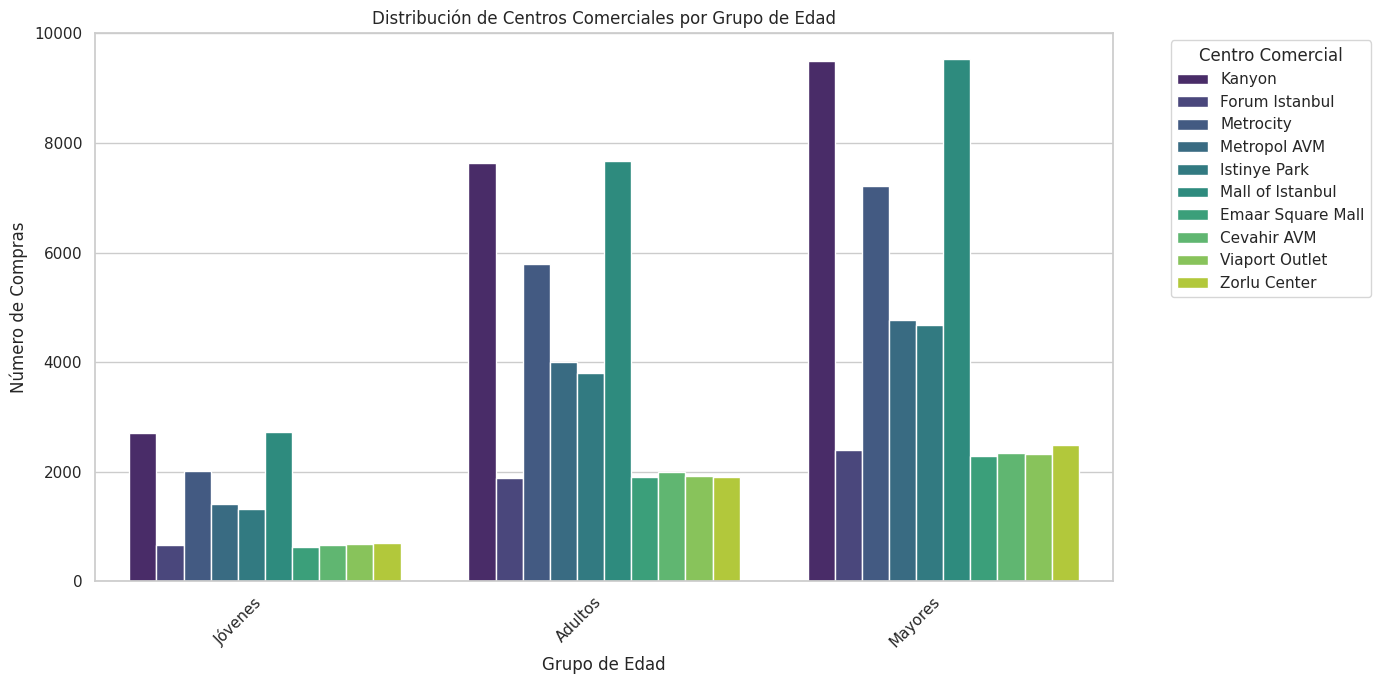

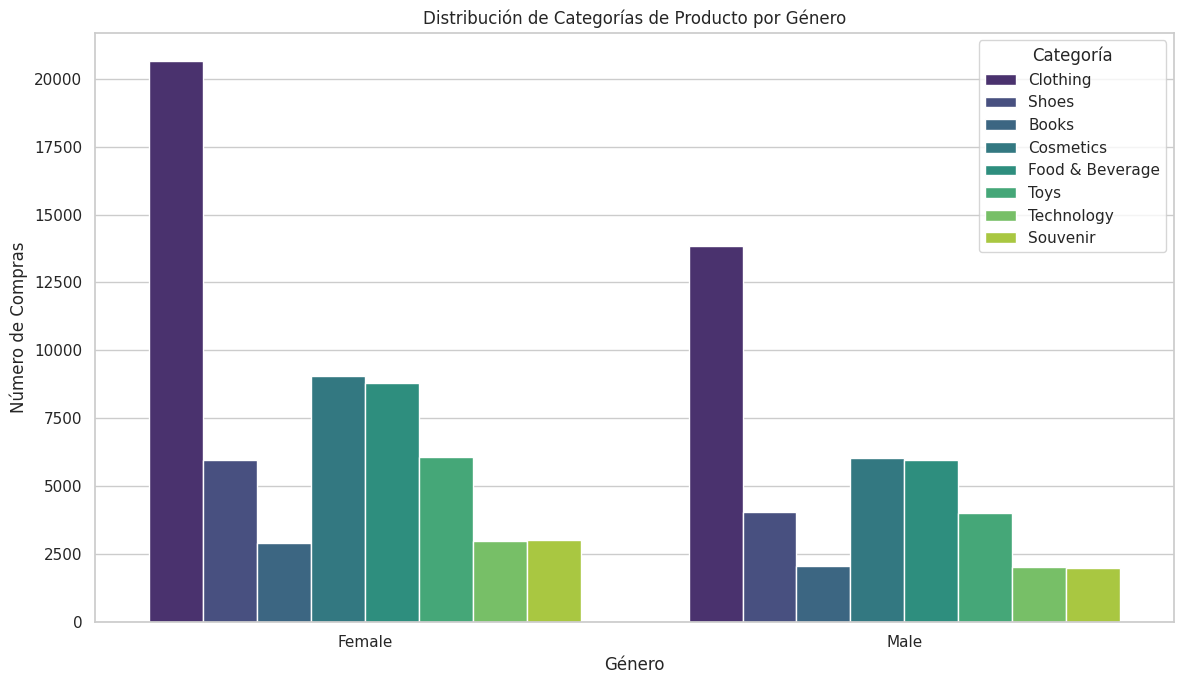

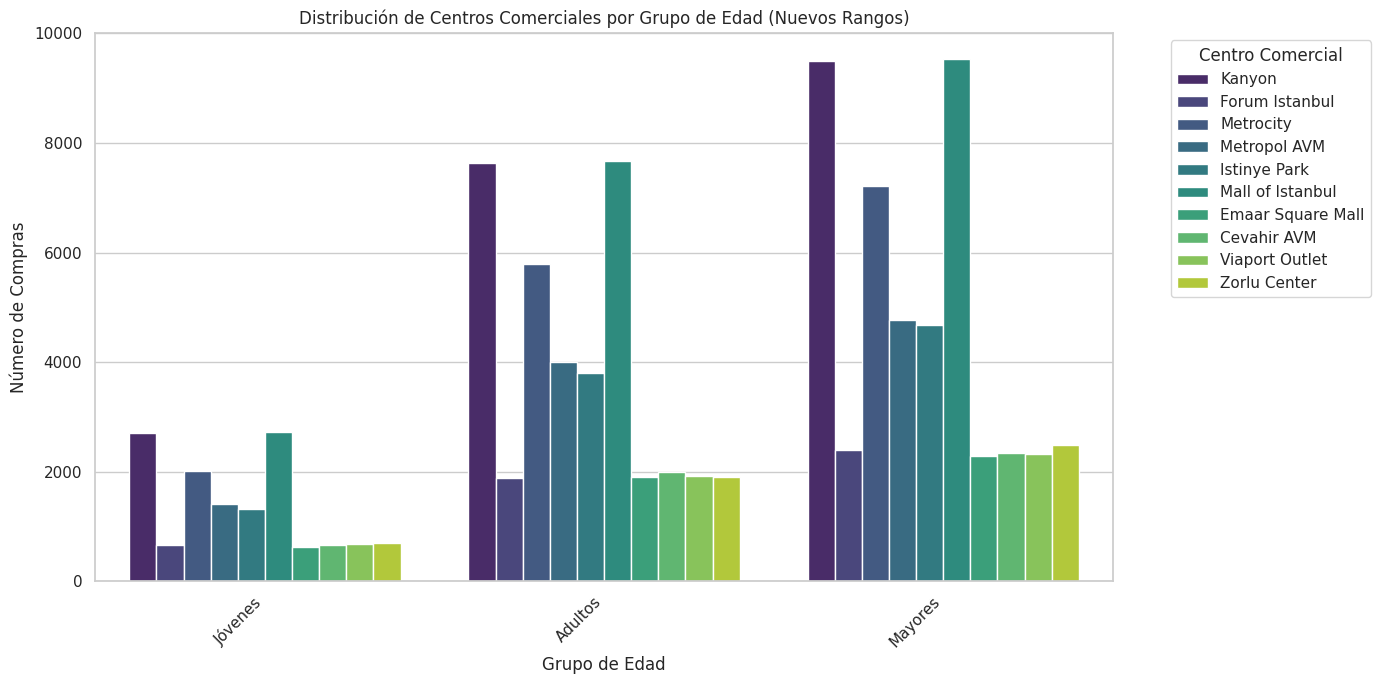

In [ ]:
# =============================================================================
# 8. VISUALIZACIONES COMPARATIVAS DE SEGMENTOS
# =============================================================================

# Comparar grupo de edad con categoría de producto
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='age_group', hue='category', palette='viridis')
plt.title('Distribución de Categorías de Producto por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

# Comparar grupo de edad con centro comercial
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='age_group', hue='shopping_mall', palette='viridis')
plt.title('Distribución de Centros Comerciales por Grupo de Edad')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Centro Comercial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Comparar género con categoría de producto
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='gender', hue='category', palette='viridis')
plt.title('Distribución de Categorías de Producto por Género')
plt.xlabel('Género')
plt.ylabel('Número de Compras')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

# Comparar grupo de edad con centro comercial (usando los nuevos rangos de edad)
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='age_group', hue='shopping_mall', palette='viridis')
plt.title('Distribución de Centros Comerciales por Grupo de Edad (Nuevos Rangos)')
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Centro Comercial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

/tmp/ipython-input-2765289296.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_total_value_age_mall = df.groupby(['age_group', 'shopping_mall'])['total_value'].mean().reset_index()


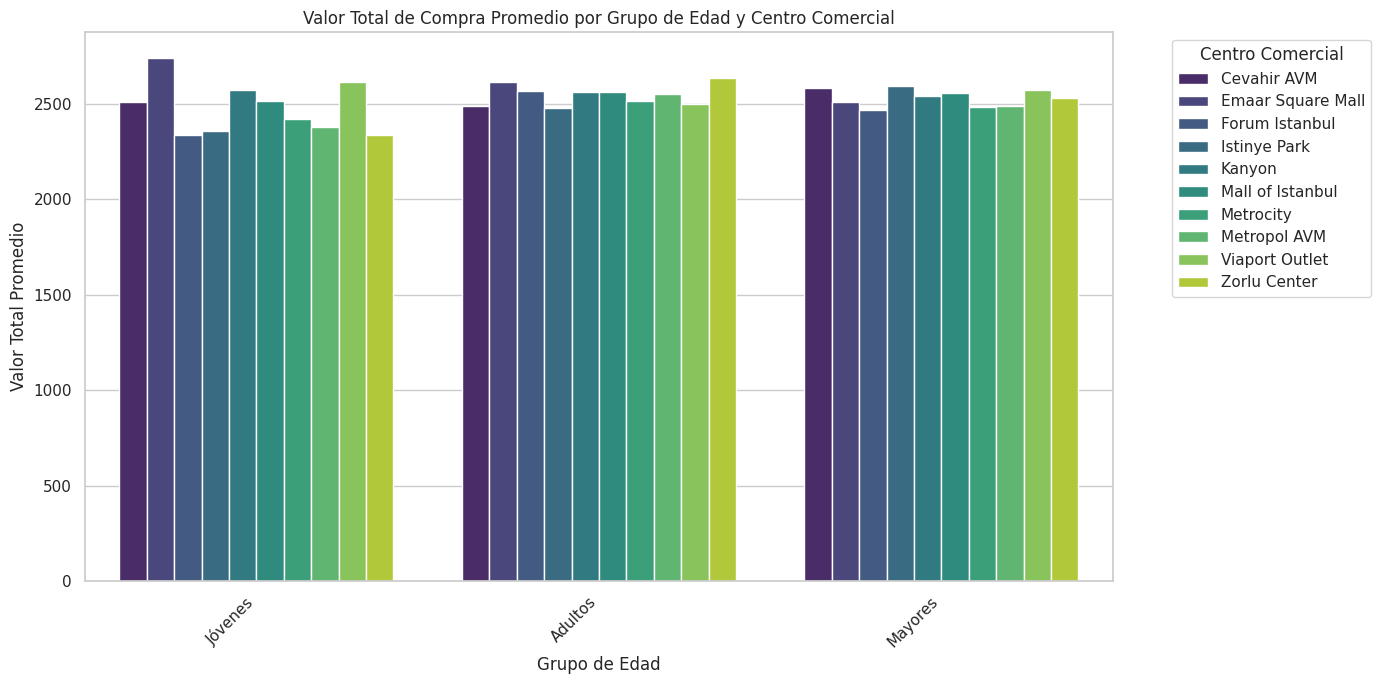

/tmp/ipython-input-2765289296.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_total_value_age_category = df.groupby(['age_group', 'category_grouped'])['total_value'].mean().reset_index()


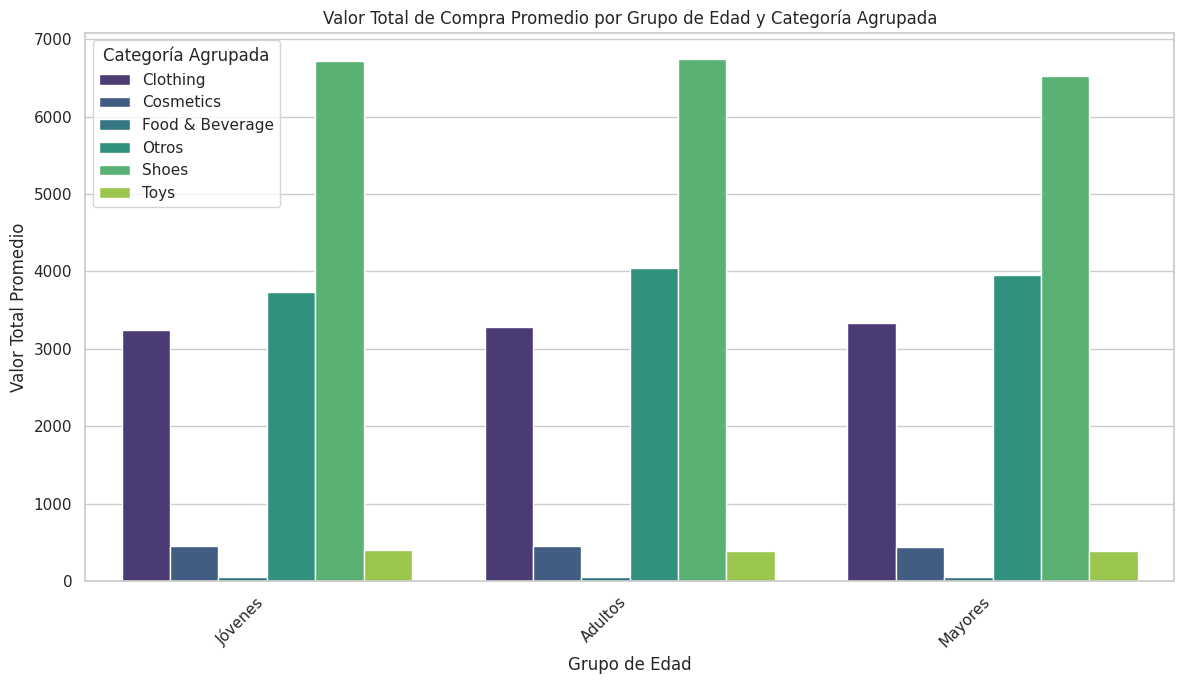

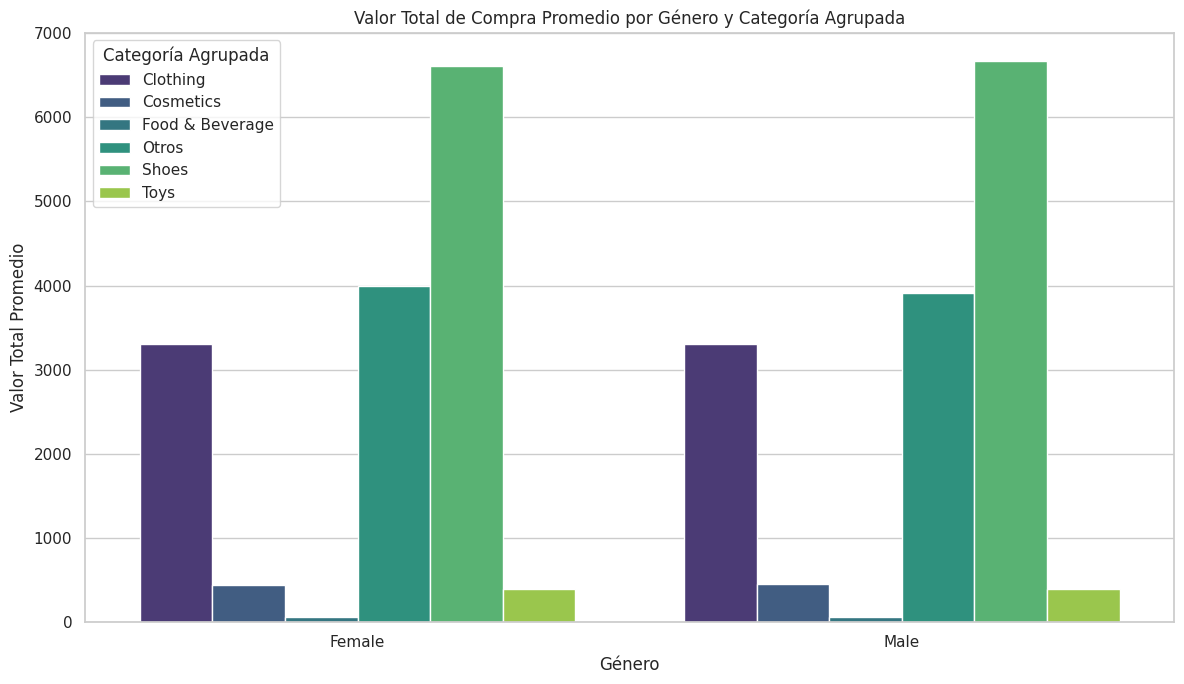

In [ ]:
# =============================================================================
# 11. ANÁLISIS FINAL DE LOS GRUPOS RESULTANTES
# =============================================================================

# Analizar el valor total de compra promedio por grupo de edad y centro comercial
avg_total_value_age_mall = df.groupby(['age_group', 'shopping_mall'])['total_value'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=avg_total_value_age_mall, x='age_group', y='total_value', hue='shopping_mall', palette='viridis')
plt.title('Valor Total de Compra Promedio por Grupo de Edad y Centro Comercial')
plt.xlabel('Grupo de Edad')
plt.ylabel('Valor Total Promedio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Centro Comercial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analizar el valor total de compra promedio por grupo de edad y categoría agrupada
avg_total_value_age_category = df.groupby(['age_group', 'category_grouped'])['total_value'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=avg_total_value_age_category, x='age_group', y='total_value', hue='category_grouped', palette='viridis')
plt.title('Valor Total de Compra Promedio por Grupo de Edad y Categoría Agrupada')
plt.xlabel('Grupo de Edad')
plt.ylabel('Valor Total Promedio')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Categoría Agrupada')
plt.tight_layout()
plt.show()

# Analizar el valor total de compra promedio por género y categoría agrupada
avg_total_value_gender_category = df.groupby(['gender', 'category_grouped'])['total_value'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=avg_total_value_gender_category, x='gender', y='total_value', hue='category_grouped', palette='viridis')
plt.title('Valor Total de Compra Promedio por Género y Categoría Agrupada')
plt.xlabel('Género')
plt.ylabel('Valor Total Promedio')
plt.legend(title='Categoría Agrupada')
plt.tight_layout()
plt.show()

el segmento que destaca por tener un alto valor total de compra es aquel que adquiere productos de la categoría "Shoes". Aunque no hay un grupo de edad o género específico que sobresalga drásticamente en el valor promedio dentro de esta categoría, podemos considerar que los clientes que compran "Shoes" son un segmento de alto valor en general.

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

Categoría de Producto (Agrupada): Influye directamente en el tipo de necesidad que el cliente busca satisfacer y el valor percibido. Las categorías de alto valor promedio ("Shoes", "Otros") sugieren compras más esporádicas pero de mayor inversión, posiblemente asociadas a necesidades específicas o de "lujo". Las categorías de bajo valor promedio y alto volumen ("Clothing", "Cosmetics", "Food & Beverage") indican compras más frecuentes y de consumo regular. La agrupación nos ayuda a enfocar las estrategias; por ejemplo, no trataríamos igual a un comprador de "Shoes" que a uno de "Food & Beverage".
Centro Comercial: Influye en la accesibilidad, la experiencia de compra y posiblemente el nivel socioeconómico de los clientes que lo frecuentan (aunque no tenemos datos directos sobre esto). Los centros comerciales con mayor volumen de ventas pueden ser puntos clave para la distribución de productos y la realización de eventos masivos. Analizar qué segmentos (por edad o género) prefieren ciertos centros comerciales nos permite optimizar la inversión en marketing localizado y adaptar la oferta de productos en cada ubicación.
En resumen, la categoría de producto nos dice qué compra el cliente, y el centro comercial nos dice dónde compra. Ambas son variables comportamentales poderosas para definir estrategias de marketing personalizadas y optimizar la asignación de recursos.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

. Un buen punto de partida podría ser enfocarse en 3-5 segmentos clave que representen un alto valor, un alto volumen, o que presenten oportunidades de crecimiento claras.

 La asignación del presupuesto debería ser proporcional al potencial de cada segmento (en términos de valor, volumen, rentabilidad o potencial de crecimiento) y a los objetivos específicos que se tengan para cada uno.
Segmentos de alto valor/volumen: Podrían recibir una mayor parte del presupuesto para mantener su lealtad y fomentar compras adicionales.
Segmentos con potencial de crecimiento: Podrían requerir inversión inicial para atraerlos y convertirlos en clientes habituales.
Segmentos de nicho de alto margen: Aunque sean pequeños en volumen, podrían justificar una inversión significativa si su rentabilidad es alta. La asignación debería ser flexible y ajustarse en función de los resultados de las campañas.
Me llama la atencion hacer segmentos con la categoria clothing